In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from scipy.stats import boxcox

df = pd.read_csv('Data_Transform.csv')
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


<AxesSubplot: xlabel='Moderate Positive Skew', ylabel='Count'>

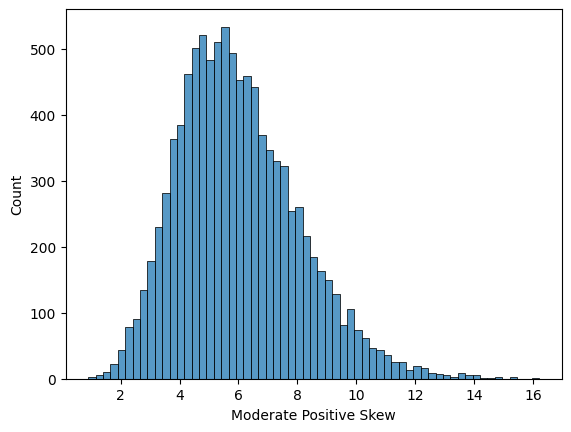

In [2]:

a = df['Moderate Positive Skew']
b = df['Highly Positive Skew']
c = df['Moderate Negative Skew']
d = df['Highly Negative Skew']
sns.histplot(a)

<AxesSubplot: xlabel='Highly Positive Skew', ylabel='Count'>

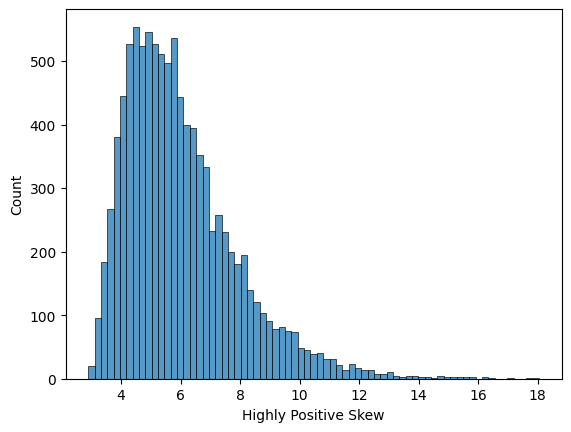

In [3]:
sns.histplot(b)

<AxesSubplot: xlabel='Moderate Negative Skew', ylabel='Count'>

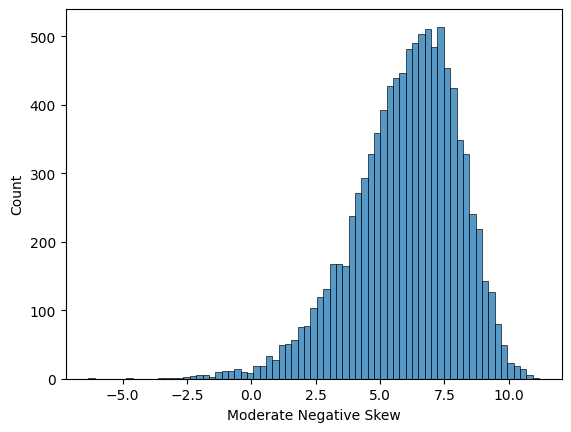

In [4]:
sns.histplot(c)

<AxesSubplot: xlabel='Highly Negative Skew', ylabel='Count'>

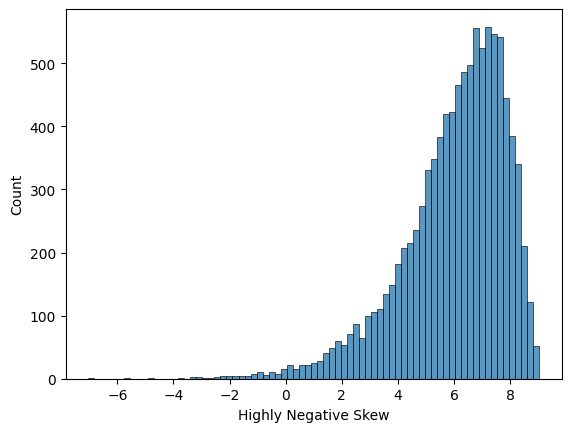

In [5]:
sns.histplot(d)

In [34]:
df_log1 = np.sqrt(df['Moderate Positive Skew'])
df_log2 = np.log(df['Highly Positive Skew'])
df_sqrt3 = np.sqrt(df['Moderate Negative Skew'])
df_sqrt4 = np.sqrt(df['Highly Negative Skew'])

C:\python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Highly Negative Skew', ylabel='Count'>

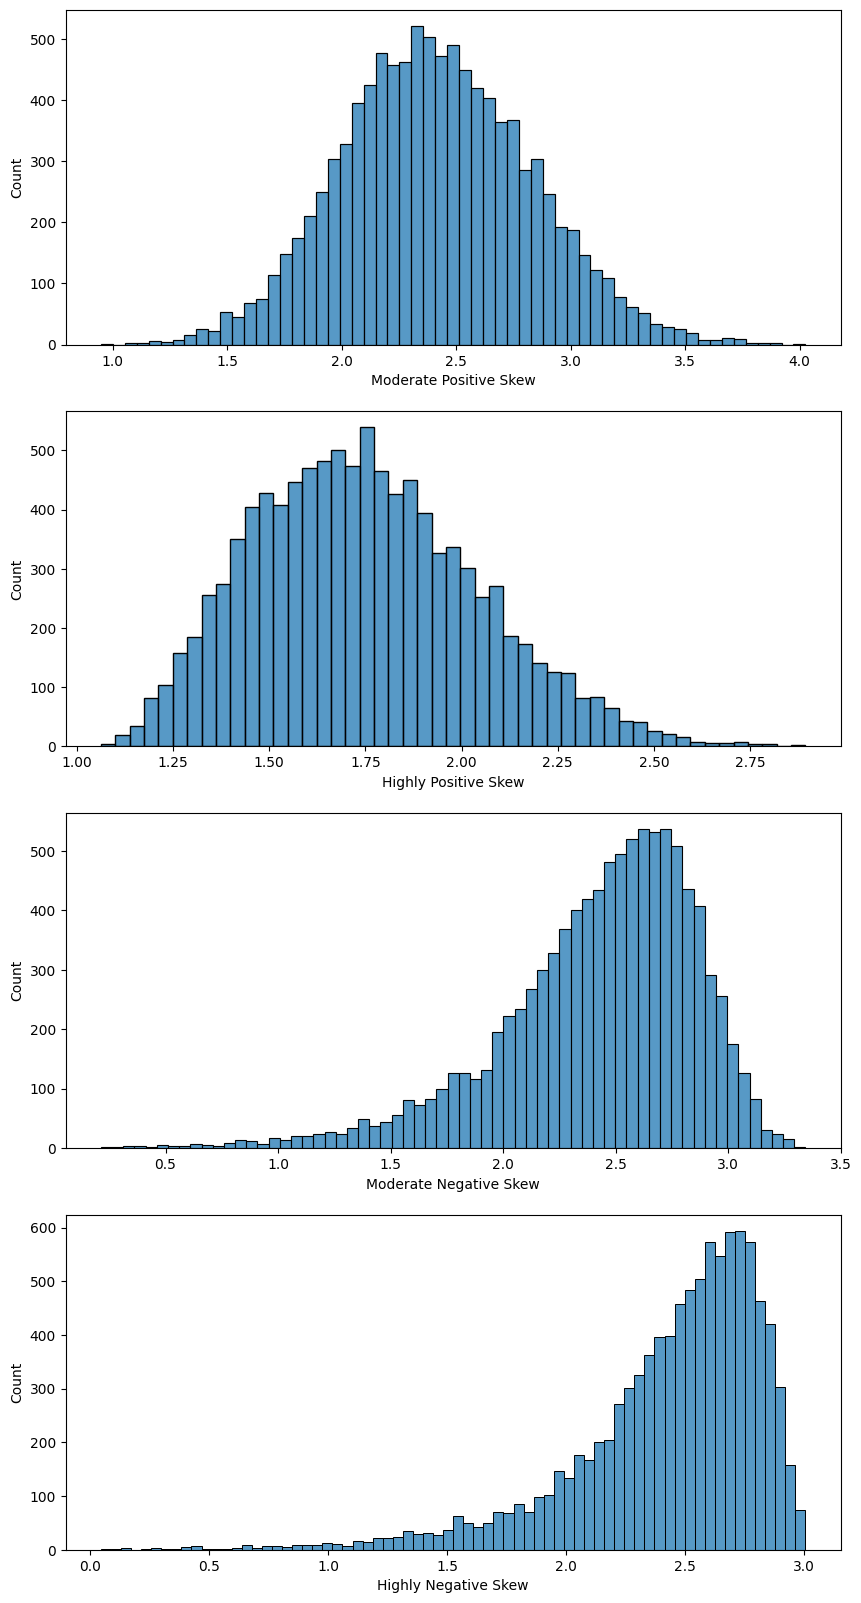

In [35]:
plt.figure(figsize=(10,20))
plt.subplot(411)
sns.histplot(df_log1)
plt.subplot(412)
sns.histplot(df_log2)
plt.subplot(413)
sns.histplot(df_sqrt3)
plt.subplot(414)
sns.histplot(df_sqrt4)


In [90]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Moderate Positive Skew,0.656308,0.584120
Highly Positive Skew,1.271249,2.405999
Moderate Negative Skew,-0.690244,0.790534
Highly Negative Skew,-1.201891,2.086863


In [95]:
# df.insert(len(df.columns),'df_log1', df_log1)


In [103]:
#  Как правило, асимметрию можно интерпретировать следующим образом: 
#                               :асимметрия
# Достаточно симметричны      от -0,5 до 0,5
# Умеренный перекос           от -0,5 до -1,0 и от 0,5 до 1,0
# Сильно искаженный            < -1,0 и > 1,0

In [29]:
from scipy.stats import shapiro

shap_test = shapiro(df_log1)

shap_test

C:\python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9985209107398987, pvalue=4.514851781323159e-08)

In [43]:
from sklearn.preprocessing import PowerTransformer

data = df['Highly Positive Skew'].values.reshape(-1, 1)

pt = PowerTransformer(method='box-cox')

df_box_cox = pt.fit_transform(data)


In [66]:
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


<AxesSubplot: ylabel='Count'>

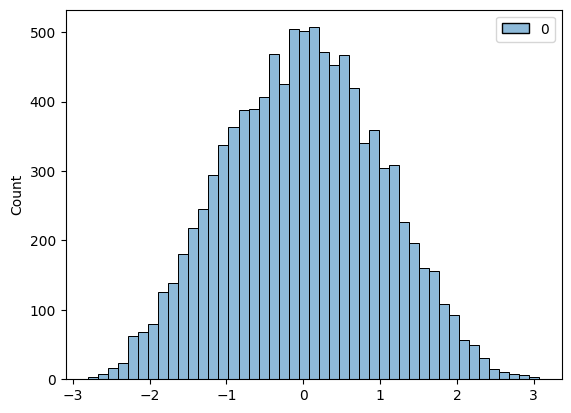

In [44]:
sns.histplot(df_box_cox)

In [98]:
# df.insert(len(df.columns), 'df2_box_cox', df_box_cox)


In [49]:
data2 = df['Moderate Negative Skew'].values.reshape(-1,1)

pt2 = PowerTransformer(method='yeo-johnson')

df2_box_cox = pt2.fit_transform(data2)

<AxesSubplot: ylabel='Count'>

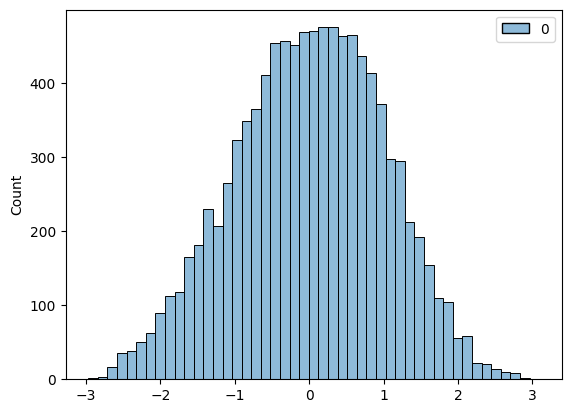

In [50]:
sns.histplot(df2_box_cox)

In [81]:
# df.insert(len(df.columns), 'df2_box_cox', df2_box_cox)


<AxesSubplot: xlabel='Moderate Negative Skew', ylabel='Count'>

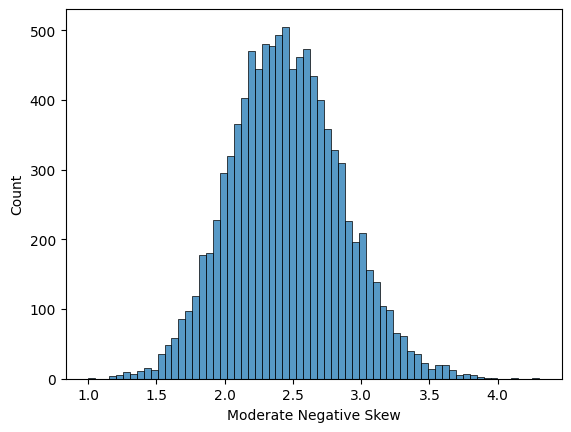

In [68]:
# мы сделали обратное распределение (т. е. max(df.iloc[:, 2] + 1) - df.iloc[:, 2]),
# а затем применили преобразование квадратного корня. Вы можете видеть на изображении ниже,
# что асимметрия становится положительной при восстановлении распределения с отрицательной асимметрией.  

mns = np.sqrt(max(df.iloc[:, 2] + 1) - df.iloc[:, 2])
sns.histplot(mns)

In [101]:
# df.insert(len(df.columns), 'df3_mns', mns)

<AxesSubplot: xlabel='Highly Negative Skew', ylabel='Count'>

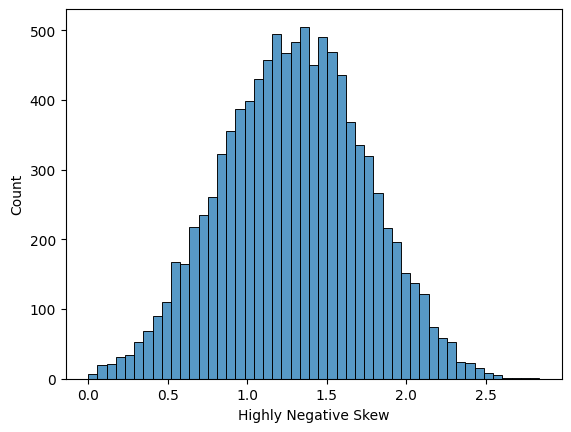

In [70]:
# ['Highly Negative Skew']

hns = np.log(max(df.iloc[:, 3] + 1) - df.iloc[:, 3])
sns.histplot(hns)

In [105]:
# df.insert(len(df.columns), 'df4_hns', hns)


In [53]:
data3 = df['Highly Negative Skew'].values.reshape(-1,1)

pt3 = PowerTransformer(method='yeo-johnson')

df3_box_cox = pt3.fit_transform(data3)

<AxesSubplot: ylabel='Count'>

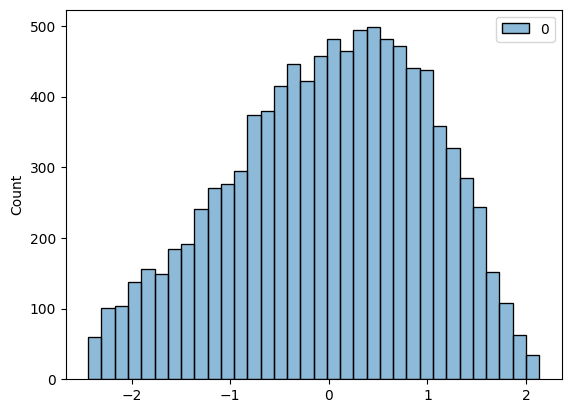

In [54]:
sns.histplot(df3_box_cox)

<AxesSubplot: xlabel='Highly Positive Skew', ylabel='Count'>

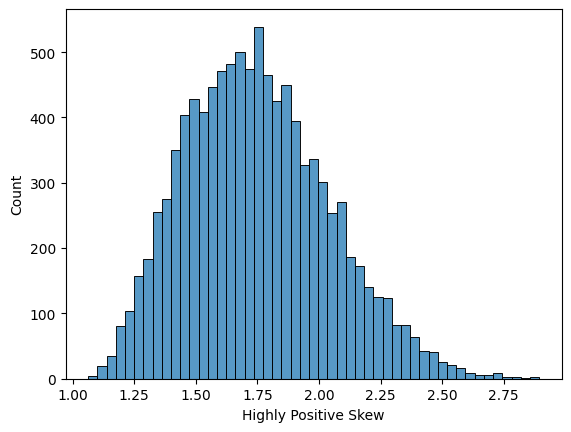

In [58]:
sns.histplot(df_log2)

In [60]:
data4 = df['Highly Positive Skew'].values.reshape(-1,1)

pt4 = PowerTransformer(method='yeo-johnson')

df4_box_cox = pt3.fit_transform(data4)

<AxesSubplot: ylabel='Count'>

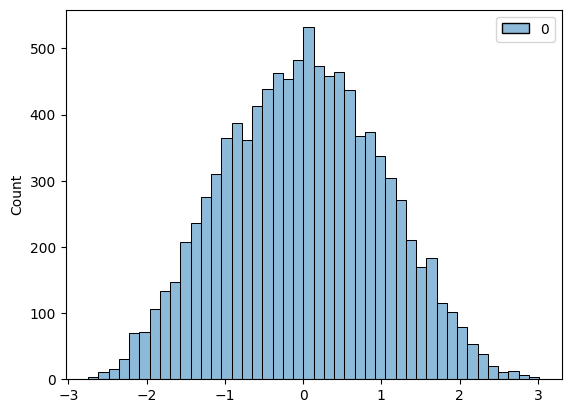

In [61]:
sns.histplot(df4_box_cox)

In [106]:
df.agg(['skew']).transpose()

,skew
Moderate Positive Skew,0.656308
Highly Positive Skew,1.271249
Moderate Negative Skew,-0.690244
Highly Negative Skew,-1.201891
df_log1,0.152479
df2_box_cox,0.023089
df3_mns,0.179761
df4_hns,-0.024227


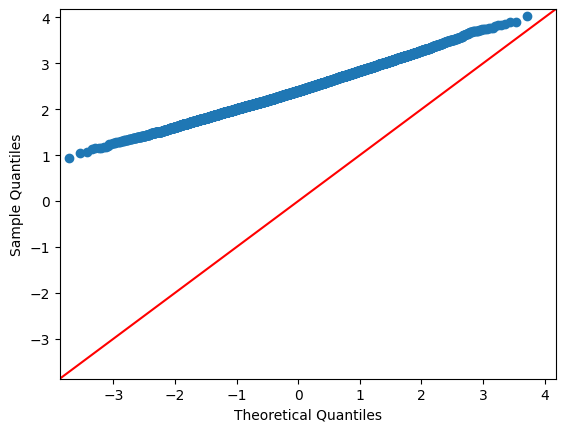

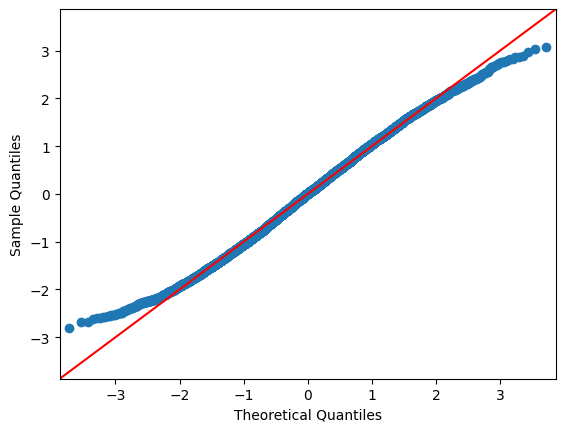

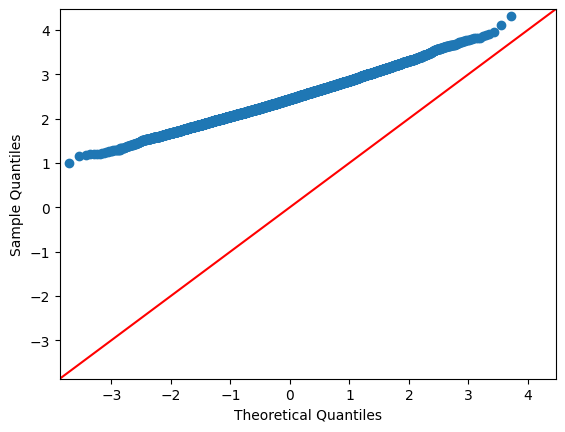

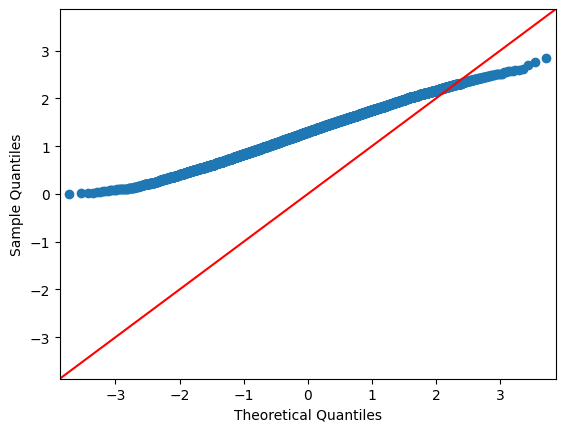

In [107]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(df['df_log1'], line='45')
sm.qqplot(df['df2_box_cox'], line='45')
sm.qqplot(df['df3_mns'], line='45')
sm.qqplot(df['df4_hns'], line='45')
py.show()